 <font size="6"> Outlier Detection
    or: How I Learned to Stop Hoarding and Love Dropping Samples
</font>

<font size="5">1. What is an outlier?</font>


<font size="5">2. Why should I care?</font>


<font size="5">3. How do I find one?</font>


<font size="5">4. What should I do when I find an outlier?</font>





<font size="6">1. What is an outlier?</font>

(or an abnormality/anomaly)

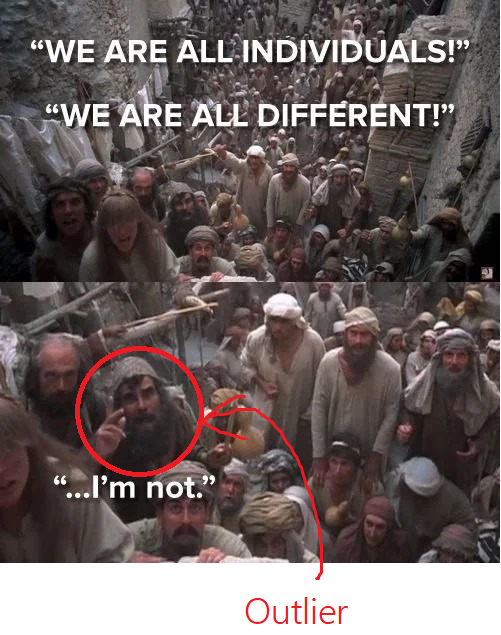


<font size="3">"An outlier is an observation which deviates so much from the other observations as to
arouse suspicions that it was generated by a different mechanism."</font>

Hawkins, wrote a whole book on outlier detection


In clustering, we try to detect groups of samples that are similiar or shomewhat related, while in outlier detection we try to detect samples that are very different from the rest of the dataset. Outliers can be viewed as samples that do not belong to any cluser, or a very small cluster that is fairly separated from all the other clusters (with respect to the defined metric for the cluster analysis).


<font size="5">What can cause an outlier?</font>

Let's talk about a few possible causes. 

<font size="4">- Measurment Errors:</font>

Some errors while measuring or documenting the data (manually or digitally) might result in an outlier or multiple outliers.

Examples:

*Wrong labeling

*Missing a decimal point when documenting measurments

*Distortion of some of the values during a faulty transmission of data

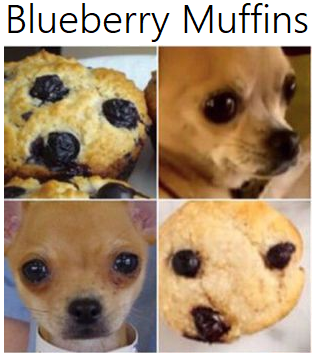

<font size="4">- Missing Values:</font>

Samples with missing values may come up as outliers. 

Example:

*Replacing missing human height or age values with zero.
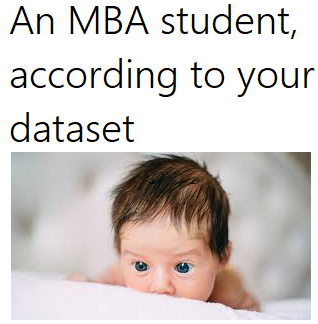

<font size="4">- Sample from a Different Population:</font>

If a data point was sampled from a different population, it might also come up as an outlier.

Example:

*A tourist surveyed on a salary survey.
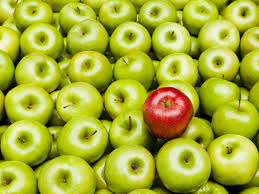

<font size="4">- An Actual Real Life Outlier:</font>

Some gound truths can be considered as outliers, as weird things do happen in real life sometimes. 

Example:

*A sample of the 9 years old electrical engineer in a quantitative skills assessment datasets.
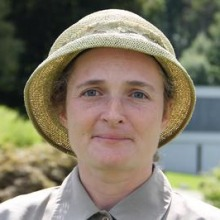

<font size="5">2. Why should I care about outliers?</font>

Sometimes, finding the outliers is a stand-alone goal like in the case of fraud detection - the abundant legitimate credit card transactions of a person will hopefully "behave" differently than the rare fraudulent transactions, and might come up as outliers.

We will focus on outlier detection as a tool in the project lifecycle. 

As we discuseed thoroughly before, the quality of the data is a key component in the success of a data science project.
Outlier detection can help us get a general view on the quality data. 
Sometimes, dropping outliers can actually improve the performance of our model - a few extremed-valued outliers can weigh on the entire model's performance, especially and crucially in linear models
Outliers also help us to understand the variation in our data, and they might suggest the need for collecting more data, choosing a different model.
Outliers also might help us understand why and where our model failed.

<font size="5">3. How do I find one?</font>

<font size="4">- Like in the olden days - EDA, domain knowledge and common sense:</font>

Some outliers can be spotted visually or by using descriptive statistics.
If you are using high dimensional data, finding outliers visually can be hard or even impossible, but maybe some can be seen after reducing the dimension of your data. 

Samples that your model consistently fail tremendously on them might also be considered as possible outliers, and inspecting those samples can be very effective for finding bad labelings.

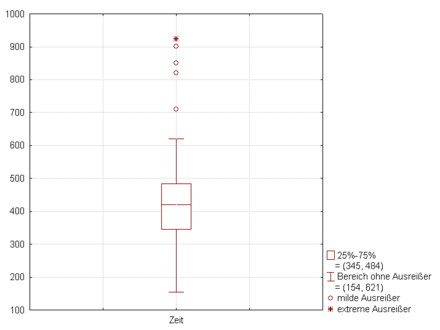

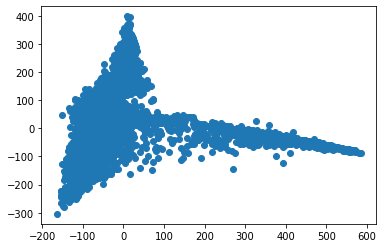

In [597]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(x_joined)
plt.scatter(pca[:,0], pca[:,1])

<font size="4">- Cluster analysis based methods:</font>

Methods that try to split the data points into clusters can be used to detect anomalies, if samples that do not belong to any cluster or small and separated clusters are found in the clustering process.

*DBSCAN

*Gaussian Mixture Models


<font size="3">- DBSCAN - Density Based Spatial Clustering of Applications with Noise</font>

A clustering algorithm that tries to map points to clusters by connectivity determined by two main parameters:                   
MinPts and epsilon.

The algorithm finds core points that have at least MinPts with maximum epsilon distance from them (according to some distance metric). Clusters are assigned by "epsilon connectivity" of core points.

Points that aren't epsilon connected to a core point are considered as outliers.


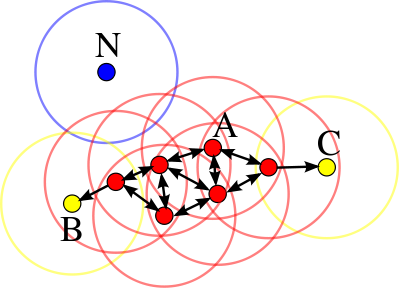

Index([   5459, 'noisy', 'noisy',    4396, 'noisy', 'noisy',    5451, 'noisy',
       'noisy', 'noisy', 'noisy', 'noisy', 'noisy', 'noisy', 'noisy'],
      dtype='object')


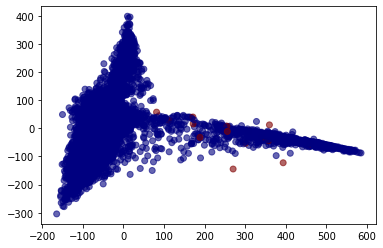

In [604]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x_joined)
clusters = DBSCAN(eps=9, min_samples=2, metric='manhattan').fit_predict(transformer.transform(x_joined))
print(x_train.index [clusters==-1])
colors = np.zeros(pca.shape[0])
colors[clusters==-1] = 1
plt.scatter(pca[:,0], pca[:,1], c=colors, cmap='jet', alpha=0.6)

<font size="4">- Density based methods:</font>

Density-based methods try to determine sparse regions in the underlying data in order to report outliers

*Nearest Neighbours approaches

*Isolation forest

*Local Outlier Factor


<font size="3">- Isolation Forest</font>

Unsurprisingly, Isolation Forest is a multiple-decision-trees based algorithm.

The algorithm builds multiple trees, where each split in every tree is at a random point on a random feature.
Data points that can be fairly isolated in a lot of trees with only a small amount of splits are considered outliers.

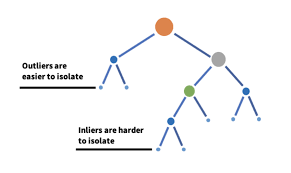

Index(['noisy', 'noisy', 'noisy', 'noisy', 'noisy', 'noisy', 'noisy', 'noisy',
       'noisy'],
      dtype='object')


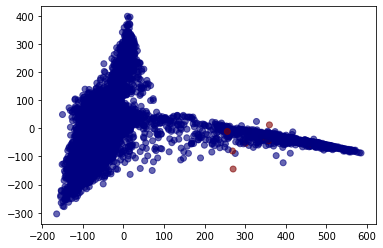

In [622]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=400, contamination=0.001).fit(x_joined)
isolated = iforest.predict(x_joined)
print(x_train.index [isolated==-1])
colors = np.zeros(pca.shape[0])
colors[isolated==-1] = 1
plt.scatter(pca[:,0], pca[:,1], c=colors, cmap='jet', alpha=0.6)

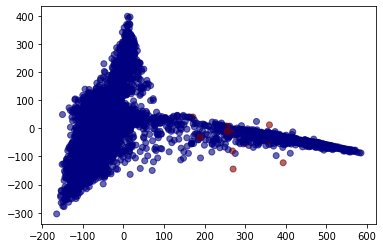

In [602]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(x_joined)
distances, indices = nbrs.kneighbors(x_joined)
thresh = np.partition(distances[:,1].flatten(), -15)[-15]
new_indices = indices[:,0][distances[:,1]>=thresh]
colors = np.zeros(pca.shape[0])
colors[new_indices] = 1
plt.scatter(pca[:,0], pca[:,1], c=colors, cmap='jet', alpha=0.6)

<font size="4">- And many, many more methods!</font>

<font size="5">4. So... Found some outliers, what should I do?</font>


Ask yourself (or a domain expert) - why are those outliers?
If it is because of missing values/bad imputations - can a change in the imputation method improve your model or make the outliers more "normal"?
If it is because of measurment errors - can the outliers be resampled? Can you try and correct the errors somehow?
If the outliers can be retraced to a different population than the rest of the data - do you need data from the other population? If the answer is no, maybe the samples can be dropped, and if the answer is yes - maybe you can try and get more data from this population or use advanced techniques to transfer knowledge about one population to another.
If the outliers are a result of a real uncommon phenomena - are you intrested in those extreme events?

As I mentioned before, in some cases - dropping outliers can improve the model. 
Although it is not always the best choice, you should not hold on to bad data.
Choosing a more robust model can be the solution in some cases, but it's a whole topic that we can't really touch in this lecture.

When it is available to actually label samples as anomalies, the success of an outlier detection method can be measured similarly to a classification method (using a confusion matrix etc.), but without any available ground truth, it is very complicated to measure it. Understanding the project goals and being able to evaluate the impact of the outliers on those goals is often your best form of available measurment.  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [636]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
regr = RandomForestRegressor(n_estimators=400).fit(x_train,  y_train)
print(mean_squared_error(y_test, regr.predict(x_test)))
print(mean_absolute_error(y_test, regr.predict(x_test)))


2918.337365962039
40.556311494796596


In [635]:
regr2 = RandomForestRegressor(n_estimators=400).fit(x_train[isolated!=-1],  y_train[isolated!=-1]) #without outliers
print(mean_squared_error(y_test, regr2.predict(x_test)))
print(mean_absolute_error(y_test, regr2.predict(x_test)))

2906.072470417455
40.46657757805109


In [492]:
df = pd.read_csv('df')
df = df.drop(columns=['Unnamed: 0', 'eco_level'])
noise = df.head(20)
noise['ל'] = np.arange(50,310,13)
noise += np.random.normal(loc=15, scale = 50, size=(noise.shape))
noise = noise.set_index(np.array(['noisy'] * 20))
noise[noise<0] = 0
noise = noise.astype(int)
df = df.append(noise)

In [495]:
x = df.drop(columns=['לא הצביעו'])
y = df['לא הצביעו']

In [496]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=42)

In [497]:
x_joined = x_train.copy()
x_joined['לא מצביעים'] = y_train